In [1]:
from fuzzycocopython import FuzzyCocoClassifier

In [2]:
model = FuzzyCocoClassifier(metrics_weights={"rmse": 4})

In [3]:
model

,nb_rules,5
,nb_max_var_per_rule,3
,max_generations,100
,max_fitness,1.0
,nb_cooperators,2
,influence_rules_initial_population,False
,influence_evolving_ratio,0.8
,nb_sets_in,2
,nb_sets_out,2
,pop_size_rules,200
,pop_size_mfs,200


In [4]:
import numpy as np

X = np.random.random((100, 30))
y = np.random.randint(0, 10, 100)

In [5]:
model.fit(X, y)

,nb_rules,5
,nb_max_var_per_rule,3
,max_generations,100
,max_fitness,1.0
,nb_cooperators,2
,influence_rules_initial_population,False
,influence_evolving_ratio,0.8
,nb_sets_in,2
,nb_sets_out,2
,pop_size_rules,200
,pop_size_mfs,200


In [6]:
model.fitness_history_

array([0.1305224 , 0.13202814, 0.13312605, 0.1355474 , 0.13745227,
       0.14056029, 0.14242401, 0.14365925, 0.14448287, 0.14625341,
       0.14695134, 0.14565233, 0.14711639, 0.14835816, 0.14848495,
       0.14944435, 0.15017227, 0.15017227, 0.15047354, 0.15051209,
       0.15053985, 0.15081162, 0.15151859, 0.15455028, 0.15768936,
       0.15824478, 0.15973724, 0.16049227, 0.16075863, 0.16146465,
       0.16175831, 0.16218346, 0.162379  , 0.16271463, 0.16293792,
       0.16325793, 0.16337986, 0.1635975 , 0.16379918, 0.16397991,
       0.16484912, 0.16711774, 0.16408467, 0.16476193, 0.1649281 ,
       0.16436258, 0.16462242, 0.16532109, 0.16546334, 0.1654879 ,
       0.16556333, 0.16556333, 0.16559952, 0.16570702, 0.16580605,
       0.16625358, 0.16648413, 0.16682525, 0.16697751, 0.1673762 ,
       0.16829717, 0.16830045, 0.16842222, 0.16857262, 0.16858708,
       0.16868055, 0.16873393, 0.17159864, 0.17184444, 0.17291197,
       0.17305679, 0.17315774, 0.17316997, 0.17316997, 0.17547

In [7]:
from fuzzycocopython import FuzzyCocoClassifier

def monitor(step):
    print(f"gen={step.generation:03d} fitness={step.fitness:.4f}")
    # stop once we’re satisfied
    if step.fitness >= 0.97:
        print("Reached target fitness; stopping early.")
        return False  # returning False aborts the loop

clf = FuzzyCocoClassifier(max_generations=100)
clf.fit_stepwise(X, y, callback=monitor)

gen=001 fitness=0.8800
gen=002 fitness=0.8900
gen=003 fitness=0.9000
gen=004 fitness=0.9000
gen=005 fitness=0.9000
gen=006 fitness=0.9000
gen=007 fitness=0.9000
gen=008 fitness=0.9000
gen=009 fitness=0.9000
gen=010 fitness=0.9000
gen=011 fitness=0.9000
gen=012 fitness=0.9000
gen=013 fitness=0.9000
gen=014 fitness=0.9000
gen=015 fitness=0.9000
gen=016 fitness=0.9100
gen=017 fitness=0.9100
gen=018 fitness=0.9100
gen=019 fitness=0.9100
gen=020 fitness=0.9100
gen=021 fitness=0.9100
gen=022 fitness=0.9100
gen=023 fitness=0.9100
gen=024 fitness=0.9100
gen=025 fitness=0.9100
gen=026 fitness=0.9100
gen=027 fitness=0.9100
gen=028 fitness=0.9100
gen=029 fitness=0.9100
gen=030 fitness=0.9100
gen=031 fitness=0.9100
gen=032 fitness=0.9100
gen=033 fitness=0.9100
gen=034 fitness=0.9100
gen=035 fitness=0.9100
gen=036 fitness=0.9100
gen=037 fitness=0.9100
gen=038 fitness=0.9100
gen=039 fitness=0.9100
gen=040 fitness=0.9100
gen=041 fitness=0.9100
gen=042 fitness=0.9100
gen=043 fitness=0.9100
gen=044 fit

,nb_rules,5
,nb_max_var_per_rule,3
,max_generations,100
,max_fitness,1.0
,nb_cooperators,2
,influence_rules_initial_population,False
,influence_evolving_ratio,0.8
,nb_sets_in,2
,nb_sets_out,2
,pop_size_rules,200
,pop_size_mfs,200


In [12]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

fitness_trace = []

def monitor(step):
    fitness_trace.append(step.fitness)
    clear_output(wait=True)  # smooth notebook updates
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(fitness_trace, marker="o")
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    ax.set_title(f"Latest fitness: {step.fitness:.4f}")
    ax.grid(True)
    plt.show()

    print(f"gen={step.generation:03d} fitness={step.fitness:.4f}")
    if step.fitness >= 0.97:  # optional early stop
        print("Reached target fitness; stopping early.")
        return False

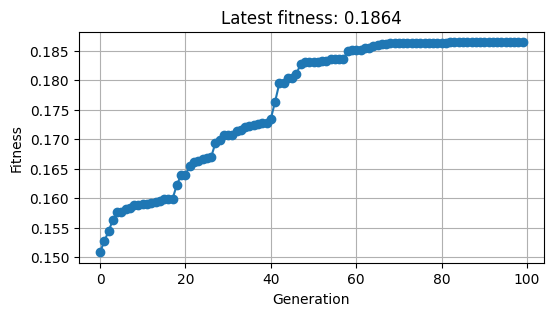

gen=100 fitness=0.1864


,nb_rules,5
,nb_max_var_per_rule,3
,max_generations,100
,max_fitness,1.0
,nb_cooperators,2
,influence_rules_initial_population,False
,influence_evolving_ratio,0.8
,nb_sets_in,2
,nb_sets_out,2
,pop_size_rules,200
,pop_size_mfs,200


In [13]:
model.fit_stepwise(X, y, callback=monitor)

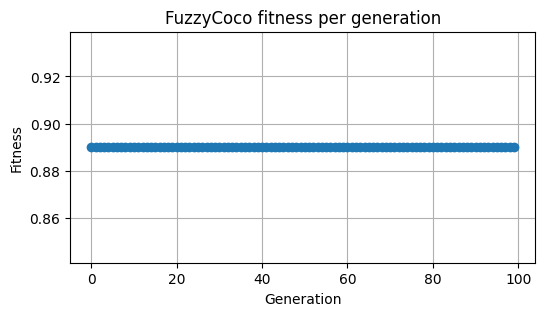

In [15]:
plt.figure(figsize=(6, 3))
plt.plot(clf.fitness_history_, marker="o")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("FuzzyCoco fitness per generation")
plt.grid(True)

In [7]:
model.save('test.pkl')

'test.pkl'

In [8]:
from fuzzycocopython import load_model

restore = load_model('test.pkl')

In [9]:
restore.rules_

[IF (feature_5 is Low AND_min feature_4 is High AND_min feature_16 is Low), THEN (OUT_1 is High),
 IF (feature_28 is Low AND_min feature_29 is High AND_min feature_3 is High), THEN (OUT_1 is Low),
 IF (feature_19 is Low), THEN (OUT_1 is High),
 IF (feature_3 is High AND_min feature_7 is High AND_min feature_11 is High), THEN (OUT_1 is Low),
 IF (feature_29 is Low AND_min feature_30 is High), THEN (OUT_1 is Low)]

In [11]:
X.shape

(100, 30)

In [ ]:
restore.rules_stat_activations(X)

: 

In [5]:
cfg_dict = {
    "global_params": {
        "nb_rules": 16,
        "nb_max_var_per_rule": 3,
        "max_generations": 50,
        "max_fitness": 0.98,
        "nb_cooperators": 5,
        "influence_rules_initial_population": False,
        "influence_evolving_ratio": 0.8,
    },
    "input_vars_params": {
        "nb_sets": 3,        # e.g. Low/Medium/High for each feature
        "nb_bits_pos": 6,    # granularity of membership-function positions
        "nb_bits_vars": 4,   # controls rule antecedent encoding; tweak as needed
        "nb_bits_sets": 2,   # encoding for the set index
    },
    "output_vars_params": {
        "nb_sets": 3,
        "nb_bits_pos": 6,
        "nb_bits_vars": 3,
        "nb_bits_sets": 2,
    },
    "rules_params": {
        "pop_size": 60,
        "elite_size": 6,
        "cx_prob": 0.8,
        "mut_flip_genome": 0.05,
        "mut_flip_bit": 0.02,
    },
    "mfs_params": {
        "pop_size": 60,
        "elite_size": 6,
        "cx_prob": 0.8,
        "mut_flip_genome": 0.05,
        "mut_flip_bit": 0.02,
    },
    "fitness_params": {
        "output_vars_defuzz_thresholds": [0.5],   # one per output variable
        "metrics_weights": {
            "accuracy": 1.0,  # pick the metrics you care about
            "rmse": 0.0,
            "sensitivity": 0.0,
            "specificity": 0.0,
        },
        # "features_weights": {"feature_0": 1.0, "feature_1": 1.0, ...},  # optional
    },
}

In [ ]:
        rows = [list(header)] + arr.astype(str).tolist()
        return DataFrame(rows, False)

In [16]:
y_arr = y

In [ ]:
if y_arr is None:
    return dfin, None

if y_arr.ndim == 1:
    y_arr = y_arr.reshape(-1, 1)
if y_arr.shape[0] != X_arr.shape[0]:
    raise ValueError("X and y must have the same number of samples")

if y_headers is not None:
    headers = list(y_headers)
else:
    headers = [f"OUT_{i + 1}" for i in range(y_arr.shape[1])]

dfout = self._make_dataframe(y_arr, headers)

(100, 3)

In [ ]:
headers = [str(i) for i in range(y.shape[0])]
rows = [list(headers)] + y.astype(str).tolist() 
dfout = core.DataFrame(rows, False)

In [13]:
headers = [str(i) for i in range(X.shape[1])]
rows = [list(headers)] + X.astype(str).tolist() 

dfin = core.DataFrame(rows, False)


In [ ]:
from fuzzycocopython import _fuzzycoco_core as core

# 1) Prepare inputs exactly as before
dfin = core.DataFrame(X.tolist(), False)
dfout = core.DataFrame(y.tolist(), False)
params = core.FuzzyCocoParams.from_dict(cfg_dict)  # whatever you already use
rng = core.RandomGenerator(1)

model = core.FuzzyCoco(dfin, dfout, params, rng)

# 2) Replace model.run() with manual control
model.init(influence=False, evolving_ratio=0.8)  # defaults, so args optional

fitness_history = []
while model.current_generation() < params.global_params.max_generations:
    fit = model.step()
    fitness_history.append(fit)
    # custom logic: logging, plotting, early stopping, etc.
    if fit >= params.global_params.max_fitness:
        break

# 3) Finalize the model exactly as before
model.select_best()
description = model.describe()

NameError: name 'dfin' is not defined